### Preparando os dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/smalvar/CalculadoraAluguel-Novembro/main/banco_final.csv')

In [3]:
dados = dados.drop(['Unnamed: 0'],axis=1)
dados.head()

,aluguel,quartos,endereco,banheiro,vaga,area,bairro,rua,zona
0,3400,2.0,"Rua Caconde, 310 - Jardim Paulista, São Paulo ...",2.0,1.0,130,Jardim Paulista,"Rua Caconde, 310",Oeste
1,3400,2.0,"Rua Oscar Caravelas, 280 - Sumarezinho, São Pa...",2.0,2.0,88,Sumarezinho,"Rua Oscar Caravelas, 280",Oeste
2,5400,2.0,"Rua Peixoto Gomide, 596 - Jardim Paulista, São...",2.0,1.0,72,Jardim Paulista,"Rua Peixoto Gomide, 596",Oeste
3,2600,2.0,"Rua Pamplona - Jardim Paulista, São Paulo - SP",2.0,1.0,91,Jardim Paulista,Rua Pamplona,Oeste
4,3800,1.0,"Pinheiros, São Paulo - SP",1.0,1.0,44,SP,"Pinheiros, São Paulo",Oeste


### Exemplo utilizando KNN 

In [14]:
X = dados[['zona', 'area', 'quartos','banheiro','vaga']]
y = dados['aluguel']

In [17]:
X.head(30)

,zona,area,quartos,banheiro,vaga
0,Oeste,130,2.0,2.0,1.0
1,Oeste,88,2.0,2.0,2.0
2,Oeste,72,2.0,2.0,1.0
3,Oeste,91,2.0,2.0,1.0
4,Oeste,44,1.0,1.0,1.0
5,Oeste,60,2.0,2.0,1.0
6,Oeste,180,4.0,5.0,4.0
7,Oeste,64,2.0,2.0,2.0
8,Oeste,165,3.0,4.0,3.0
9,Oeste,60,2.0,2.0,1.0


In [21]:
X = pd.get_dummies(X)

In [22]:
X.head()

,area,quartos,banheiro,vaga,zona_Centro,zona_Leste,zona_Norte,zona_Oeste,zona_Sul
0,130,2.0,2.0,1.0,0,0,0,1,0
1,88,2.0,2.0,2.0,0,0,0,1,0
2,72,2.0,2.0,1.0,0,0,0,1,0
3,91,2.0,2.0,1.0,0,0,0,1,0
4,44,1.0,1.0,1.0,0,0,0,1,0


In [23]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [24]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

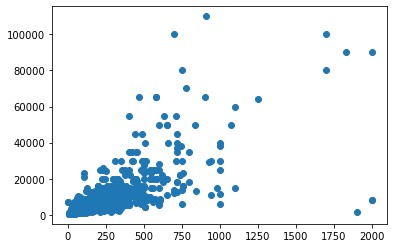

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(dados['area'],dados['aluguel'])

C:\Users\ctn_g\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


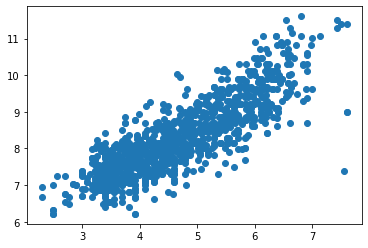

In [26]:
plt.scatter(np.log(dados['area']),np.log(dados['aluguel']))

### Identificando o melhor modelo

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train, test = train_test_split(dados, test_size=0.25, random_state=1, stratify=dados['zona'])

In [33]:
import numpy as np
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)

In [34]:
X_cols=['zona', 'area', 'quartos','banheiro','vaga']
y_col=['aluguel']

In [35]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [37]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [40]:
!pip install xgboost

In [42]:
!pip install lightgbm

In [43]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

regressor_list = [ KNeighborsRegressor(),
                  LinearRegression(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  XGBRegressor(),
                  MLPRegressor(),
                  LGBMRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=5)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando KNeighborsRegressor
Train score 0.7985911413749257
Validation score [0.66945804 0.75771847 0.70358054 0.7286198  0.60056736]
Test score 0.7209396684217904
Treinando LinearRegression
Train score 0.7413310011623597
Validation score [0.69283186 0.79287584 0.72278178 0.76214167 0.64519801]
Test score 0.7533225177776965
Treinando DecisionTreeRegressor
Train score 0.9758351645143398
Validation score [0.5990066  0.59300249 0.6066439  0.42801891 0.60363006]
Test score 0.6686500927039032
Treinando RandomForestRegressor
Train score 0.945778595023023
Validation score [0.70765262 0.78348996 0.75860225 0.69021964 0.73889729]
Test score 0.7849017071763067
Treinando XGBRegressor
Train score 0.9630670799901603
Validation score [0.66998745 0.7272265  0.70926709 0.63177362 0.69306454]
Test score 0.7758716381640421
Treinando MLPRegressor
Train score 0.7688524165012491
Validation score [0.69465788 0.75208098 0.72496922 0.74376362 0.55406286]
Test score 0.7756567933685983
Treinando LGBMRegressor


In [44]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [47]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [48]:
reg = gs.best_estimator_

In [49]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.8045924988915034
Validation score [0.74617778 0.7633818  0.73210872]
Test score 0.7914393048009649


In [50]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)

Todos estimadores de regressão

In [52]:
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, RegressorClass in estimators:
    try:
        print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
    except Exception as e:
        print(e)

Appending ARDRegression
Appending AdaBoostRegressor
Appending BaggingRegressor
Appending BayesianRidge
Appending CCA
Appending DecisionTreeRegressor
Appending DummyRegressor
Appending ElasticNet
Appending ElasticNetCV
Appending ExtraTreeRegressor
Appending ExtraTreesRegressor
Appending GammaRegressor
Appending GaussianProcessRegressor
Appending GradientBoostingRegressor
Appending HistGradientBoostingRegressor
Appending HuberRegressor
Appending IsotonicRegression
Appending KNeighborsRegressor
Appending KernelRidge
Appending Lars
Appending LarsCV
Appending Lasso
Appending LassoCV
Appending LassoLars
Appending LassoLarsCV
Appending LassoLarsIC
Appending LinearRegression
Appending LinearSVR
Appending MLPRegressor
Appending MultiOutputRegressor
__init__() missing 1 required positional argument: 'estimator'
Appending MultiTaskElasticNet
Appending MultiTaskElasticNetCV
Appending MultiTaskLasso
Appending MultiTaskLassoCV
Appending NuSVR
Appending OrthogonalMatchingPursuit
Appending OrthogonalM

In [53]:
for reg in all_regs:
  try:
    print('Treinando', reg.__class__.__name__)
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    val_score = cross_val_score(reg, X_train, y_train, cv=3)
    test_score = reg.score(X_test, y_test)
    print('Train score', train_score)
    print('Validation score', val_score)
    print('Test score', test_score)
    print('='*80)
  except Exception as e:
    print(e)

Treinando ARDRegression
Train score 0.7409320868670166
Validation score [0.73752212 0.74464116 0.69679906]
Test score 0.7513967418284355
Treinando AdaBoostRegressor
Train score 0.7726119487310269
Validation score [0.72592335 0.75781662 0.71944718]
Test score 0.7746848764408041
Treinando BaggingRegressor
Train score 0.9380888243650768
Validation score [0.71531809 0.75368966 0.7058991 ]
Test score 0.7712325664224327
Treinando BayesianRidge
Train score 0.7412595218911704
Validation score [0.73924346 0.73952322 0.69406951]
Test score 0.7525237557882295
Treinando CCA
Train score 0.4317964995208492
Validation score [0.54210957 0.40444593 0.31109328]
Test score 0.5611536052170512
Treinando DecisionTreeRegressor
Train score 0.9758351645143398
Validation score [0.55717727 0.53565768 0.55966628]
Test score 0.671082060843888
Treinando DummyRegressor
Train score 0.0
Validation score [-5.84323116e-05 -4.15321710e-03 -5.54408125e-03]
Test score -0.001309354247712946
Treinando ElasticNet
Train score 

Train score 0.6713405701282102
Validation score [0.63827525 0.63274515 0.44709042]
Test score 0.6867135442312446
Treinando RadiusNeighborsRegressor
Input contains NaN, infinity or a value too large for dtype('float64').
Treinando RandomForestRegressor
Train score 0.9452984772769931
Validation score [0.73784325 0.75575451 0.72899193]
Test score 0.783943367166371
Treinando Ridge
Train score 0.7413273504004801
Validation score [0.73918287 0.73885379 0.69387009]
Test score 0.7531546911164784
Treinando RidgeCV
Train score 0.7410195029403793
Validation score [0.73897873 0.74035323 0.69405378]
Test score 0.751489011381281
Treinando SGDRegressor
Train score 0.5828531201172182
Validation score [0.22765965 0.61788041 0.22469028]
Test score 0.661298721769852
Treinando SVR
Train score 0.7757415229091802
Validation score [0.7554474  0.73365338 0.71894524]
Test score 0.7693913413524823
Treinando TheilSenRegressor
Train score 0.6681998804260534
Validation score [0.72442189 0.64131462 0.61164338]
Test